<a href="https://colab.research.google.com/github/qsergean/Baldwin-Lomax-Turbulence-Model/blob/main/transition_bl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ результатов прямого численного моделирования турбулентных течений

### План работы:

1) Обработка данных прямого численного моделирования.

2) Осреднение по времени

3) Вычисление турбулентной вязкости для модели Болдуина-Ломакса.

4) Анализ величин и их распределения.

4) Подсчет уравнения Рейнольдса с моделью Болдуина-Ломакса для рассматриваемого течения.

5) Детальное сравнивнение с данными прямого численного моделирования.

In [ ]:
!wget -O "Transition_BL_Time_Averaged_Profiles.h5" "http://turbulence.pha.jhu.edu/docs/transition_bl/Transition_BL_Time_Averaged_Profiles.h5"

--2022-05-24 16:09:49--  http://turbulence.pha.jhu.edu/docs/transition_bl/Transition_BL_Time_Averaged_Profiles.h5
Resolving turbulence.pha.jhu.edu (turbulence.pha.jhu.edu)... 128.220.233.141
Connecting to turbulence.pha.jhu.edu (turbulence.pha.jhu.edu)|128.220.233.141|:80... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2022-05-24 16:10:57 ERROR 500: Internal Server Error.



In [ ]:
import matplotlib.pyplot as plt
import h5py as h5
import math
import numpy as np

f = h5.File('drive/MyDrive/Transition_BL_Time_Averaged_Profiles.h5','r')
z = f.keys()
print (z)

um = np.transpose(np.array(f['um']))
vm = np.transpose(np.array(f['vm']))
wm = np.transpose(np.array(f['wm']))
pm = np.transpose(np.array(f['pm']))
xc = np.transpose(np.array(f['x_coor']))
yc = np.transpose(np.array(f['y_coor']))

# um /= 10
# vm /= 10

dudy = np.zeros((3320,224))
dvdx = np.zeros((3320,224))
omega = np.zeros((3320,224))
tau = np.zeros((3320,224))
v_star = np.zeros((3320,224))
l_star = np.zeros((3320,224))
y_plus = np.zeros((3320,224))
u_plus = np.zeros((3320,224))
# turb_visc = np.zeros((3320,224))

# visc = 1.25e-3
visc = 1.48e-4

ro = 1
print(um.shape)
for j in range (1,223):
	for i in range (1,3320):
		dudy[i][j] = (abs(um[i, j+1] - um[i, j-1])) / ((yc[j+1] - yc[j-1]))
		dvdx[i][j] = (abs(vm[i, j+1] - vm[i, j-1])) / ((xc[j+1] - xc[j-1]))
		tau[i][j] = visc * dudy[i][j]
		v_star[i][j] = math.sqrt(tau[i][j]/ro)
		if (v_star[i][j] == 0):
			# print("ALERT!")
			v_star[i][j] = 1 * 10**(-5)
		l_star[i][j] = visc / v_star[i][j];
		y_plus[i][j] = yc[j] * v_star[i][1] / visc;
		u_plus[i][j] = um[i,j] / v_star[i][1];
		# turb_visc[i][j] = ro * l_star[300][1]**2 * dudy[i][j] # это ерунда

<KeysViewHDF5 ['pm', 'ppm', 'um', 'upm', 'uum', 'uvm', 'uwm', 'vm', 'vpm', 'vvm', 'vwm', 'wm', 'wpm', 'wwm', 'x_coor', 'y_coor', 'z_coor']>
(3320, 224)


In [ ]:
np.max(pm)

0.0013464002404361963

In [ ]:
np.min(pm)

-0.018104085698723793

## Исходные данные

In [ ]:
# Изменение размера картинки
index = 3320/224
size = 6
plt.rcParams['figure.figsize'] = [size, size]

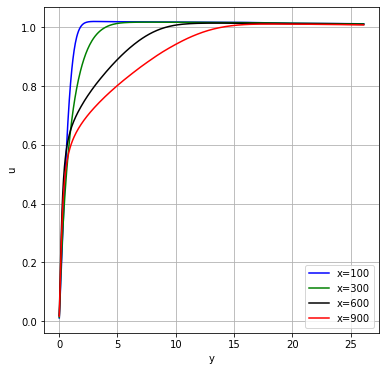

In [ ]:
# plt.title(r'u', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'u')
plt.grid()
plt.plot(yc[1:-1], um[240,1:-1], color="blue", label='x=100')
plt.plot(yc[1:-1], um[930,1:-1], color="green", label='x=300')
plt.plot(yc[1:-1], um[1950,1:-1], color="black", label='x=600')
plt.plot(yc[1:-1], um[3000,1:-1], color="red", label='x=900')
plt.legend()
plt.savefig("um_bl")
plt.show()

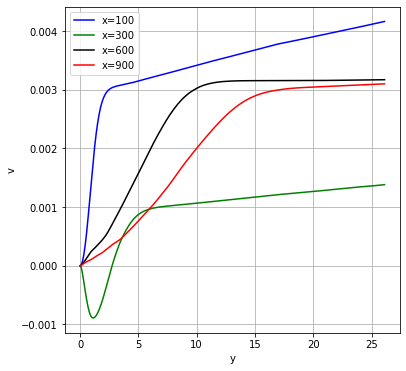

In [ ]:
# plt.title(r'u', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'v')
plt.grid()
plt.plot(yc[1:-1], vm[240,1:-1], color="blue", label='x=100')
plt.plot(yc[1:-1], vm[930,1:-1], color="green", label='x=300')
plt.plot(yc[1:-1], vm[1950,1:-1], color="black", label='x=600')
plt.plot(yc[1:-1], vm[3000,1:-1], color="red", label='x=900')
plt.legend()
plt.savefig("vm_bl")
plt.show()

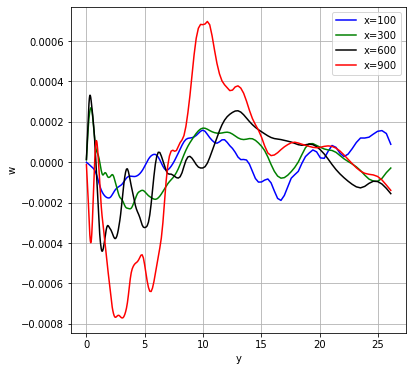

In [ ]:
# plt.title(r'u', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'w')
plt.grid()
plt.plot(yc[1:-1], wm[240,1:-1], color="blue", label='x=100')
plt.plot(yc[1:-1], wm[930,1:-1], color="green", label='x=300')
plt.plot(yc[1:-1], wm[1950,1:-1], color="black", label='x=600')
plt.plot(yc[1:-1], wm[3000,1:-1], color="red", label='x=900')
plt.legend()
plt.savefig("wm_bl")
plt.show()

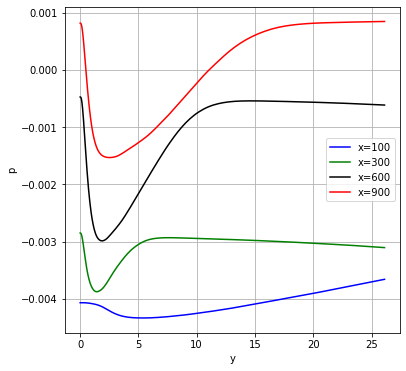

In [ ]:
# plt.title(r'u', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'p')
plt.grid()
plt.plot(yc[1:-1], pm[240,1:-1], color="blue", label='x=100')
plt.plot(yc[1:-1], pm[930,1:-1], color="green", label='x=300')
plt.plot(yc[1:-1], pm[1950,1:-1], color="black", label='x=600')
plt.plot(yc[1:-1], pm[3000,1:-1], color="red", label='x=900')
plt.legend()
plt.savefig("pm_bl")
plt.show()

In [ ]:
# Изменение размера картинки
index = 3320/224 / 2
size = 5
plt.rcParams['figure.figsize'] = [index * size, size]

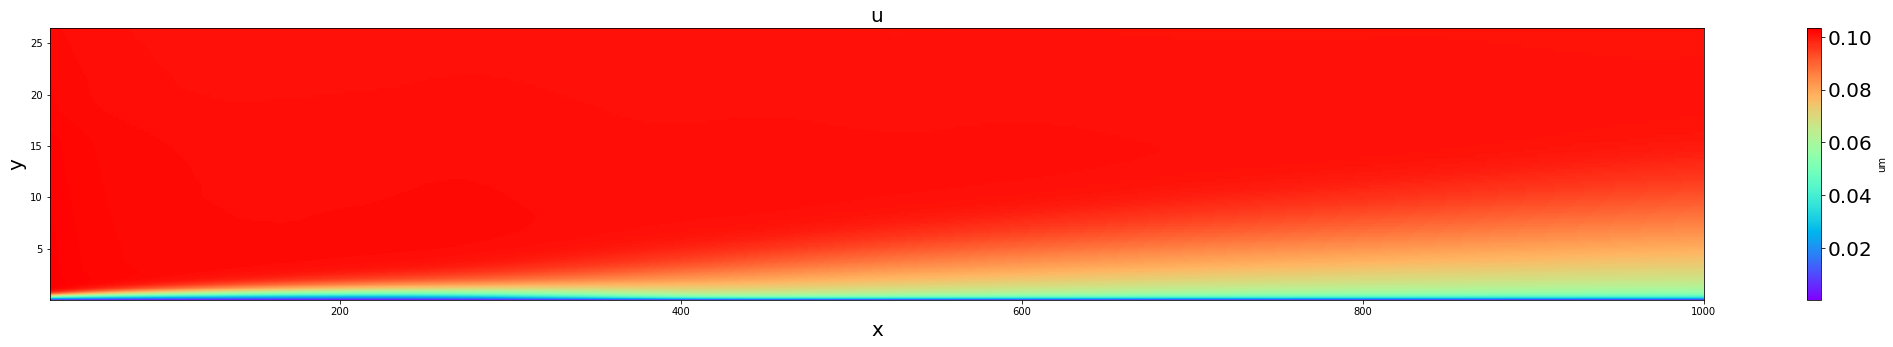

In [ ]:
fsize = 20

plt.title("u", fontsize=fsize)
plt.xlabel("x", fontsize=fsize)
plt.ylabel("y", fontsize=fsize)
plt.pcolormesh(xc, yc, np.transpose(um))
cbar = plt.colorbar(label="um")
cbar.ax.tick_params(labelsize=fsize)
plt.set_cmap('rainbow')
plt.savefig("um.png")
plt.show()

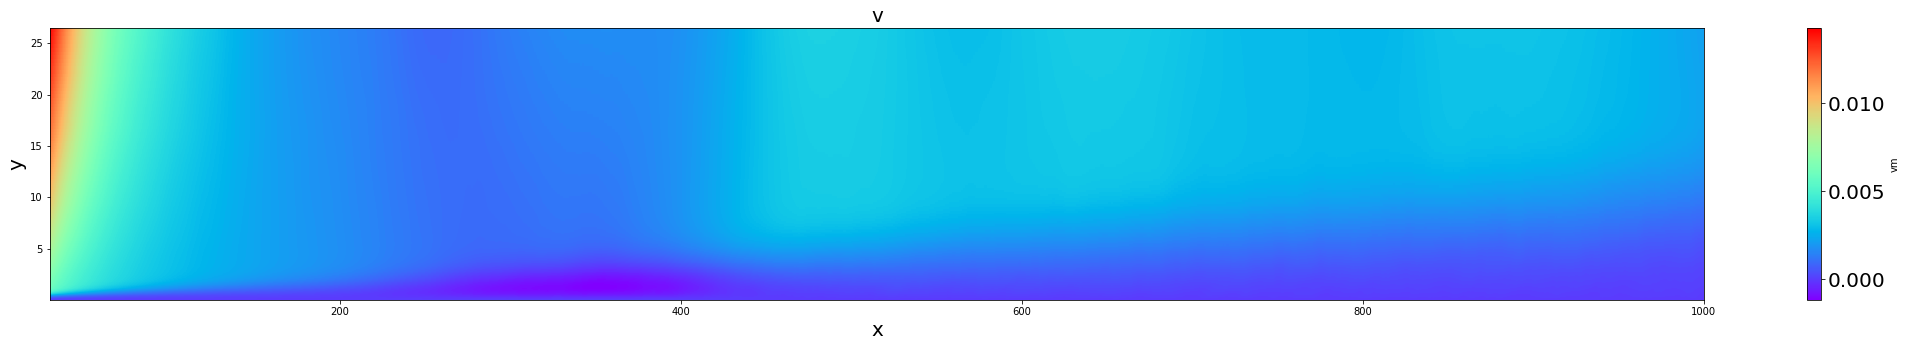

In [ ]:
fsize = 20

plt.title("v", fontsize=fsize)
plt.xlabel("x", fontsize=fsize)
plt.ylabel("y", fontsize=fsize)
plt.pcolormesh(xc, yc, np.transpose(vm))
cbar = plt.colorbar(label="vm")
cbar.ax.tick_params(labelsize=fsize)
plt.set_cmap('rainbow')
plt.savefig("vm.png")
plt.show()

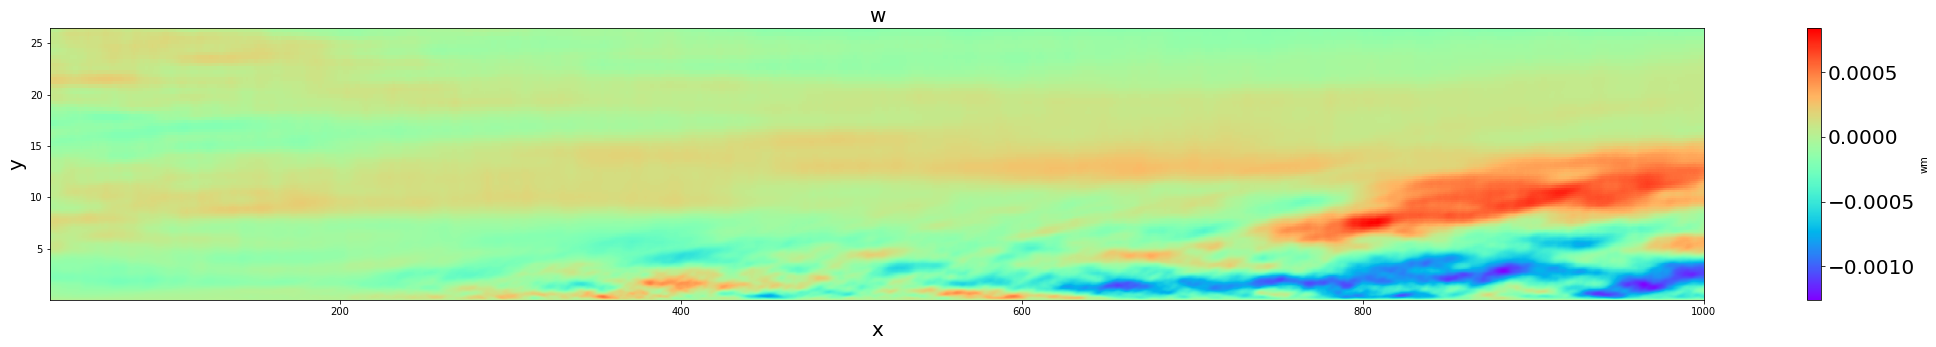

In [ ]:
fsize = 20

plt.title("w", fontsize=fsize)
plt.xlabel("x", fontsize=fsize)
plt.ylabel("y", fontsize=fsize)
plt.pcolormesh(xc, yc, np.transpose(wm))
cbar = plt.colorbar(label="wm")
cbar.ax.tick_params(labelsize=fsize)
plt.set_cmap('rainbow')
plt.savefig("wm.png")
plt.show()

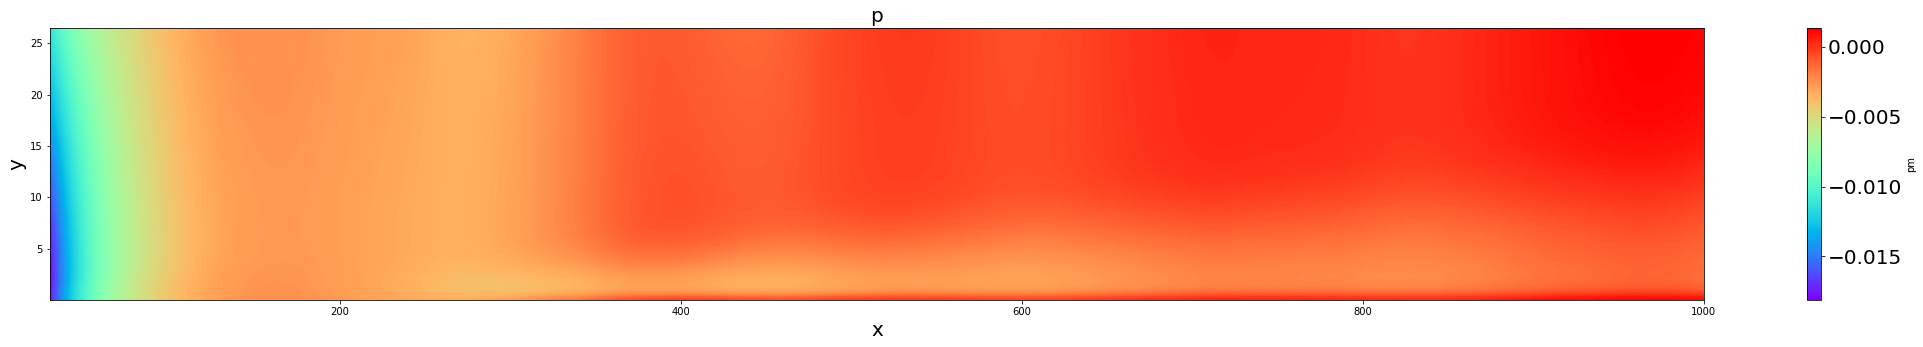

In [ ]:
fsize = 20

plt.title("p", fontsize=fsize)
plt.xlabel("x", fontsize=fsize)
plt.ylabel("y", fontsize=fsize)
plt.pcolormesh(xc, yc, np.transpose(pm))
cbar = plt.colorbar(label="pm")
cbar.ax.tick_params(labelsize=fsize)
plt.set_cmap('rainbow')
plt.savefig("pm.png")
plt.show()

In [ ]:
# Изменение размера картинки
index = 3320/224
size = 5
plt.rcParams['figure.figsize'] = [size*1.4, size]

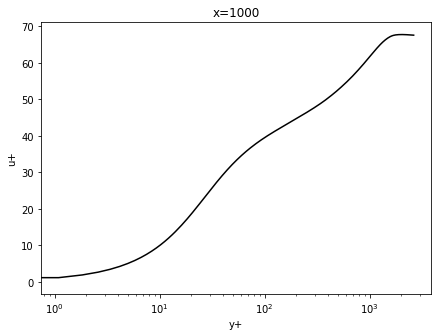

In [ ]:
plt.title("x=1000")
plt.xlabel("y+")
plt.ylabel("u+")
# plt.grid([200,300,500])
# plt.grid()
plt.xscale('log')
plt.plot(y_plus[3319,:-1], u_plus[3319,:-1], color="black")
# plt.savefig("log_x100")
plt.show()

## Модель Болдуина-Ломакса

In [ ]:
real_y_plus = (yc[1] - yc[0]) * v_star[300, 1] / visc
real_u_plus = um[300, 1] / v_star[300, 1]
print("y+ =", real_y_plus)
print("u+ =", real_u_plus)

y+ = 0.18170275113169398
u+ = 0.2715348865850736


In [ ]:
real_y_plus = (yc[1] - yc[0]) * v_star[1000, 1] / visc
real_u_plus = um[1000, 1] / v_star[1000, 1]
print("y+ =", real_y_plus)
print("u+ =", real_u_plus)

y+ = 0.0074038734447028865
u+ = 11.066163241488045


In [ ]:
real_y_plus = (yc[1] - yc[0]) * v_star[3000, 1] / visc
real_u_plus = um[3000, 1] / v_star[3000, 1]
print("y+ =", real_y_plus)
print("u+ =", real_u_plus)

y+ = 0.008055033827066878
u+ = 12.040476674702587


In [ ]:
print(np.min(y_plus[1:-1,1]), np.max(y_plus[:,1]))
print(np.min(u_plus[1:-1,1]), np.max(u_plus[:,1]))

0.008741555949273444 0.013534121408493584
8.742244584159431 13.53580867041327


In [ ]:
k = 0.4
A_plus = 26

omega = 0.5 * (dudy - dvdx)
omega_mod = np.absolute(omega)
# тут я мог обсчитаться, т.к. непонятно, считать это как произведение матриц,
# или как их элементов
# UPD: все норм
l = k * yc * (1 - np.exp(real_y_plus *(-1) / A_plus))
l_sq = l**2
mu_ti = ro * l_sq * omega_mod
# print(mu_ti[1:,1:-1])

In [ ]:
C_cp = 1.6
C_kleb = 0.3
K = 0.0168
C_wk = 0.25
F = yc * omega_mod * (1 - np.exp(real_y_plus *(-1) / A_plus))
F_max = np.max(F)
print("F_max =", F_max)

i = 0
while (i < 3320):
  j = 0
  while (j < 224):
    if F[i][j] == F_max:
      print("i = ", i, "j = ", j)
      y_max = yc[j]
    j += 1
  i += 1
print ("y_max =", y_max)
u_dif = np.max(np.absolute(um)) - np.min(np.absolute(um))
# print(F_max)
F_wake = min(y_max * F_max, C_wk * y_max  * u_dif**2 / F_max)
F_kleb = (1 + 5.5 * (yc * C_kleb / y_max)**6)**(-1)

mu_to = ro * K * C_cp * F_wake * F_kleb

# print(mu_to)

F_max = 0.0002010626477904791
i =  1 j =  41
y_max = 0.47117705549212907


In [ ]:
# mu_t = np.zeros((3320, 224))
# j = 0
# while (j < 100):
#   i = 0
#   while (i < 3320):
#     mu_t[i][j] = mu_ti[i][j]
#     i += 1
#   j += 1

# while (j < 224):
#   i = 0
#   while (i < 3320):
#     mu_t[i][j] = ro * omega_mod[i][j]
#     i += 1
#   j += 1

In [ ]:
eps = 1e-7
mu_t = np.zeros((3320, 224))
i = 0
while (i < 3320):
  j = 0
  while (j < 140):
    mu_t[i][j] = mu_ti[i][j]
    j += 1
  while (j < 224):
    if mu_to[j] - eps <= mu_ti[i][j] and mu_ti[i][j] <= mu_to[j] + eps:
      while (j < 224):
        mu_t[i][j] = mu_to[j]
        j += 1
      break
    mu_t[i][j] = mu_ti[i][j]
    j += 1
  i += 1

### Срез границ + только область, близкая к границе

In [ ]:
# Изменение размера картинки
index = 3320/224 / 1.5
size = 5
plt.rcParams['figure.figsize'] = [index * size, size]

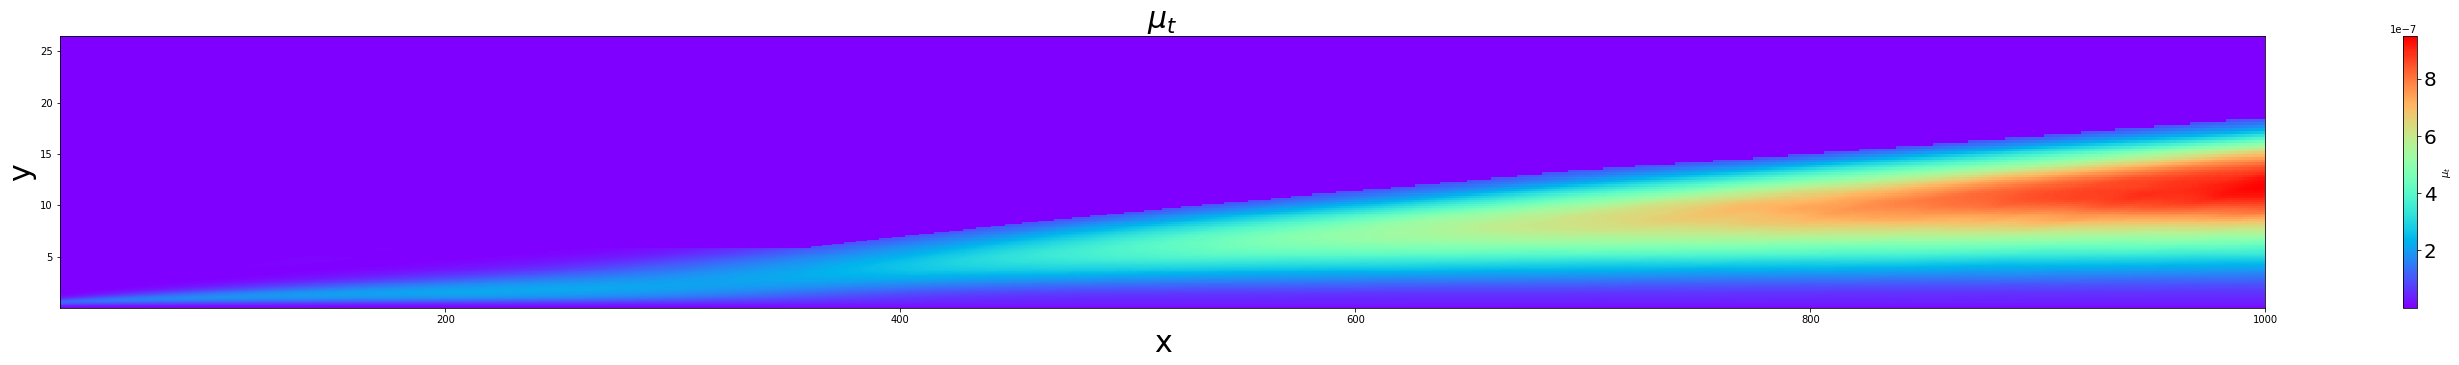

In [ ]:
fsize = 30

plt.title(r'$\mu_t$', fontsize=fsize)
plt.xlabel("x", fontsize=fsize)
plt.ylabel("y", fontsize=fsize)
plt.pcolormesh(xc[1:], yc[1:], np.transpose(mu_t[1:,1:]))
cbar = plt.colorbar(label=r'$\mu_t$')
cbar.ax.tick_params(labelsize=20)
plt.set_cmap('rainbow')
plt.savefig("mu_t.png")
plt.show()

## Графики в сечениях

In [ ]:
# Изменение размера картинки
index = 3320/224
size = 8
plt.rcParams['figure.figsize'] = [size, size]

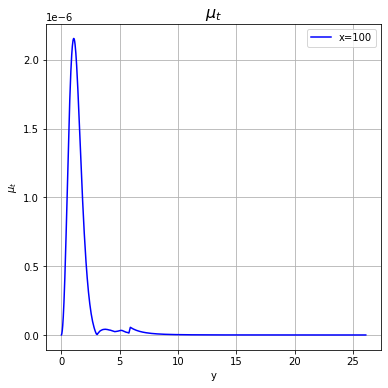

In [ ]:
plt.title(r'$\mu_t$', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'$\mu_t$')
plt.grid()
plt.plot(yc[1:-1], mu_t[240,1:-1], color="blue", label='x=100')
# plt.plot(yc[1:-1], mu_t[930,1:-1], color="green", label='x=300')
# plt.plot(yc[1:-1], mu_t[1950,1:-1], color="black", label='x=600')
# plt.plot(yc[1:-1], mu_t[3000,1:-1], color="red", label='x=900')
plt.legend()
plt.savefig("mu_t_x100")
plt.show()

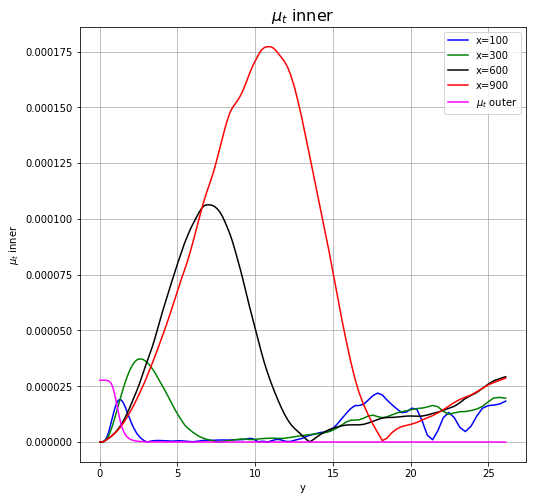

In [ ]:
plt.title(r'$\mu_t$ inner', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'$\mu_t$ inner')
plt.grid()
plt.plot(yc[1:-1], mu_ti[240,1:-1], color="blue", label='x=100')
plt.plot(yc[1:-1], mu_ti[930,1:-1], color="green", label='x=300')
plt.plot(yc[1:-1], mu_ti[1950,1:-1], color="black", label='x=600')
plt.plot(yc[1:-1], mu_ti[3000,1:-1], color="red", label='x=900')
plt.plot(yc[1:-1], mu_to[1:-1], color="magenta", label=r'$\mu_t$ outer')
plt.legend()
plt.savefig("mu_tio")
plt.show()

In [ ]:
yc[100]
yc[0]

0.0035788992998408986

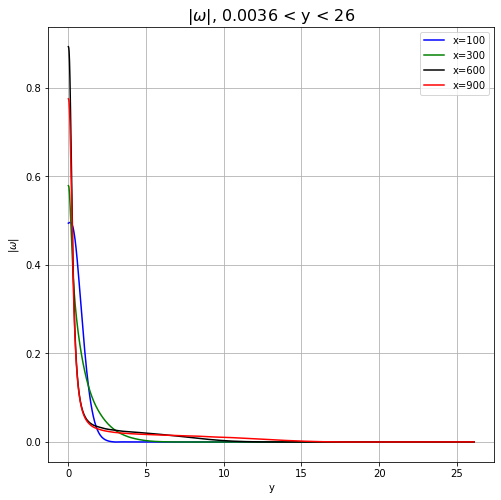

In [ ]:
plt.title(r'|$\omega$|, 0.0036 < y < 26', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'|$\omega$|')
plt.grid()
plt.plot(yc[1:-1], omega_mod[240,1:-1], color="blue", label='x=100')
plt.plot(yc[1:-1], omega_mod[930,1:-1], color="green", label='x=300')
plt.plot(yc[1:-1], omega_mod[1950,1:-1], color="black", label='x=600')
plt.plot(yc[1:-1], omega_mod[3000,1:-1], color="red", label='x=900')
# plt.plot(yc[1:-1], l_sq[1:-1], color="magenta", label=r'$\mu_t$ outer')
plt.legend()
plt.savefig("omega_mod_all")
plt.show()

No handles with labels found to put in legend.


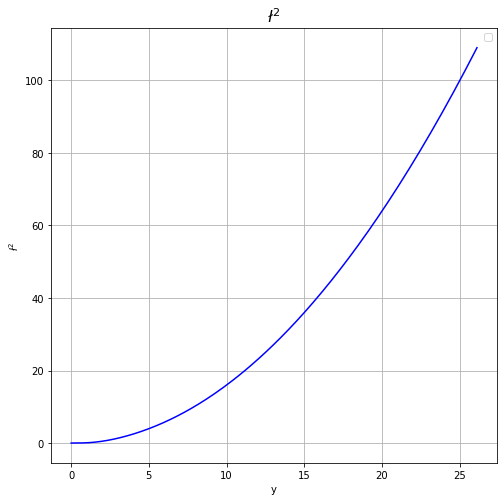

In [ ]:
plt.title(r'$\l^2$', fontsize=16)
plt.xlabel("y")
plt.ylabel(r'$\l^2$')
plt.grid()
plt.plot(yc[:-1], l_sq[:-1], color="blue")
# plt.plot(yc[1:-1], l_sq[1:-1], color="magenta", label=r'$\mu_t$ outer')
plt.legend()
plt.savefig("l_squared")
plt.show()

In [ ]:
err = 1
i = 0
while (i < 3320):
  if ((xc[i] >= 600 - err) and (xc[i] <= 600 + err)):
    print(i)
  i+=1

1947
1948
1949
1950
1951
1952
1953


In [ ]:
eps = 0.2
xc[(xc[:] >= 300 - eps) & (xc[:] <= 300 + eps)]
(xc[:] >= 300 - eps) & (xc[:] <= 300 + eps).all()
# x=np.array([ [1,2,3,4],
#            [5,6,7,8],
#            [9,10,11,12],
#            [13,14,15,16]])

# x[(x[:,0] >= 5) & (x[:,0] <= 9) ]


array([False, False, False, ..., False, False, False])

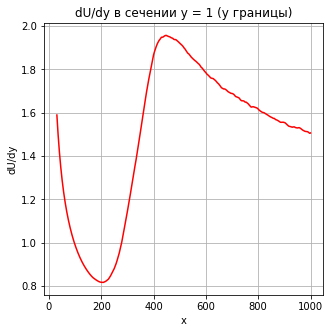

In [ ]:
plt.title("dU/dy в сечении y = 1 (у границы)")
plt.xlabel("x")
plt.ylabel("dU/dy")
plt.plot(xc[1:], dudy[1:,2], color='red')
plt.grid()
plt.savefig("dudy_y1")
plt.show()

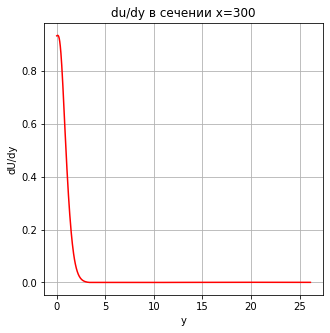

In [ ]:
plt.title("du/dy в сечении x=300")
plt.xlabel("y")
plt.ylabel("dU/dy")
plt.grid()
plt.plot(yc[1:-1], dudy[300,1:-1], color="red")
plt.savefig("dudy_x300")
plt.show()

### Итоги сравнения модели Спаларта-Алмареса и модели Болдуина-Ломакса
Распределения продольных скорости U одинаковы. При этом распрпеделения поперечных скоростей различнаюся. Полагаю, что это связано с разницей рассматриваемых областей - в JHTDB область берется через какое-то расстояние от эллиптического края обтекаемой плоскости.

Также в датасете JHTDB максимальное знаечние давления идет равным 0. В результатах моделирования Спаларта-Алмареса минимальное знаечние равно 1. Из-за чего сдвиг на константу. Само распределение в целом похоже.

Если я верно понимаю, что mum - молекулярная взкость, то для Болдуина-Ломакса я брал её равной 1.25e-3, что в 8,5 раз больше среднего значения для Спаларта-Алмареса. Также для Б-Л я брал ее постоянной по всей рассматриваемой области. Но в присланных Вами данных вариативность небольшая, так что не считаю это критическим моментом.

Теперь, собственно, самое интересное - турбулентная вязкость. Обнаружил, что подсчитанная мною турбулентная вязкость Б-Л вне погранслоя mu_t_outer по значениям, в целом совпадает со Спалартом-Алмаресом. Разница для макс значений - в два раза, но не на порядки. Но распределение, разумеется, иное. Чем ближе к стенке - тем больше турбулентная вязкость. 


In [ ]:
print(1.25e-3 / 0.00014825)

8.431703204047217


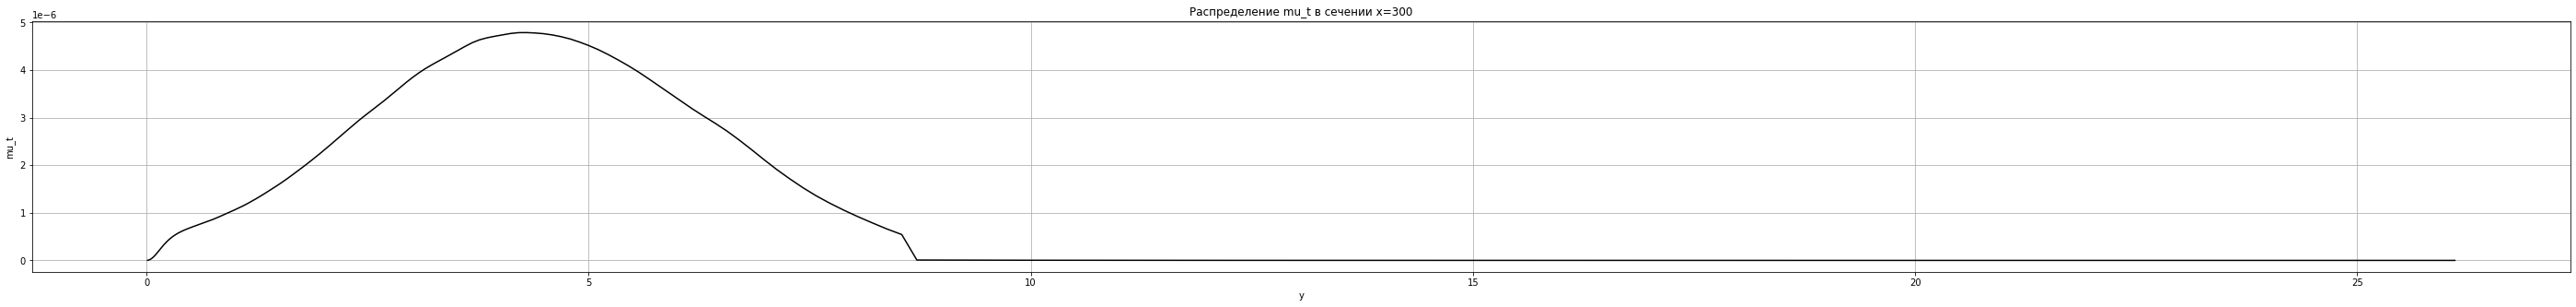

In [ ]:
plt.title("Распределение mu_t в сечении x=300")
plt.xlabel("y")
plt.ylabel("mu_t")
plt.grid()
plt.plot(yc[1:-1], mu_t[1319,1:-1], color="black")
plt.savefig("mu_t_x300")
plt.show()

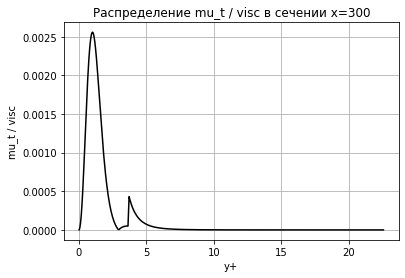

In [ ]:
plt.title("Распределение mu_t / visc в сечении x=300")
plt.xlabel("y+")
plt.ylabel("mu_t / visc")
plt.grid()
plt.plot(y_plus[300, 1:-1], mu_t[300,1:-1] / visc, color="black")
plt.savefig("mu_t_x300_nosize")
plt.show()

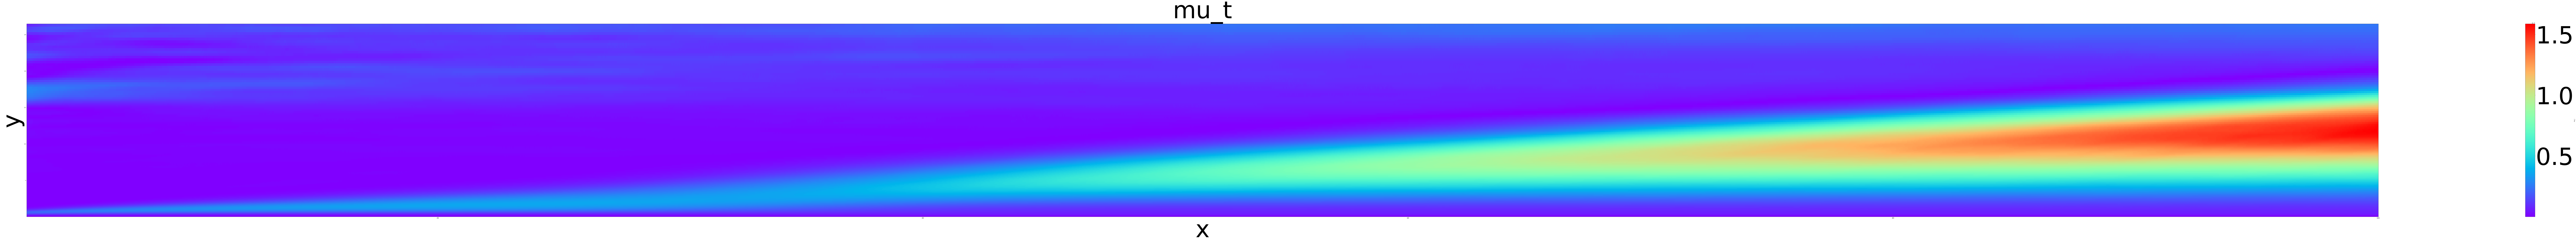

In [ ]:
plt.title("mu_ti", fontsize=200)
plt.xlabel("x", fontsize=200)
plt.ylabel("y", fontsize=200)
plt.pcolormesh(xc[1:], yc[1:], np.transpose(mu_ti[1:,1:]))
cbar = plt.colorbar(label="mu_t")
plt.savefig("mu_t.png")
cbar.ax.tick_params(labelsize=200)
plt.set_cmap('rainbow')
plt.show()

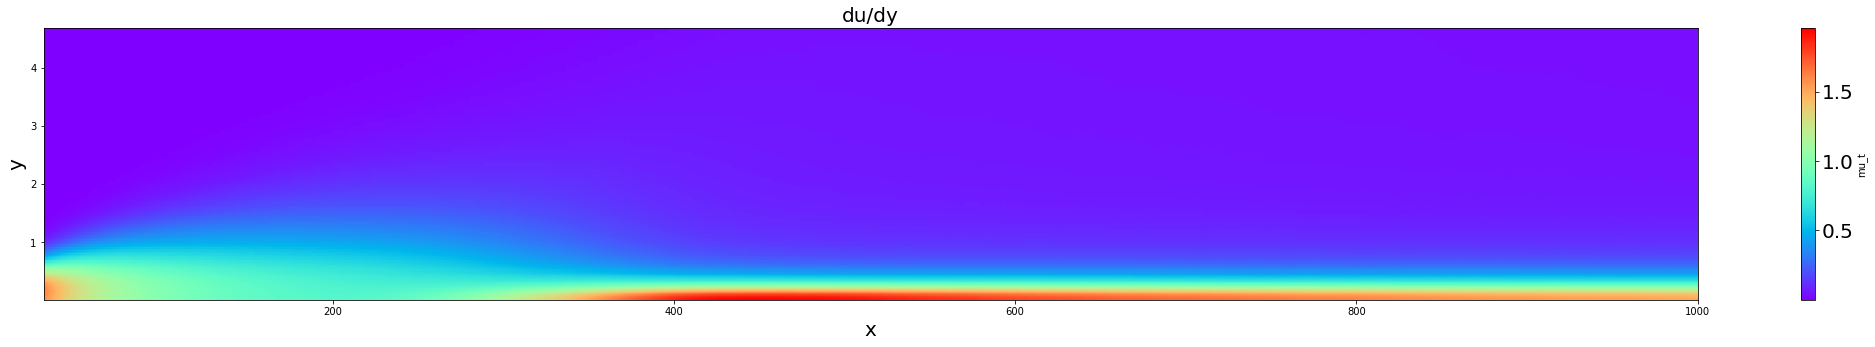

In [ ]:
plt.title("du/dy", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.pcolormesh(xc[1:], yc[1:130], np.transpose(dudy[1:,1:130]))
cbar = plt.colorbar(label="mu_t")
plt.savefig("dudy.png")
cbar.ax.tick_params(labelsize=20)
plt.set_cmap('rainbow')
plt.savefig("dudy.png")
plt.show()

In [ ]:
# plt.title("du/dy", fontsize=200)
# plt.xlabel("x", fontsize=200)
# plt.ylabel("y", fontsize=200)
# test = np.gradient(um)
# plt.pcolormesh(xc, yc, test)
# # plt.savefig("dudy.png")
# # plt.show()

ValueError: ignored

## Анализ данных

In [ ]:
# Изменение размера картинки
index = 3320/224
size = 8
plt.rcParams['figure.figsize'] = [size, size]

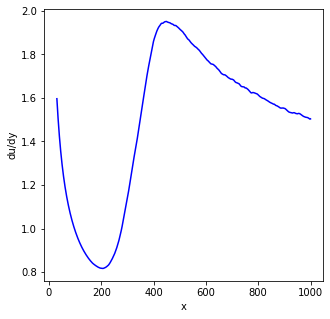

In [ ]:
plt.xlabel("x")
plt.ylabel("du/dy")
plt.plot(xc[1:-1], dudy[1:-1,4], color="blue")
plt.show()

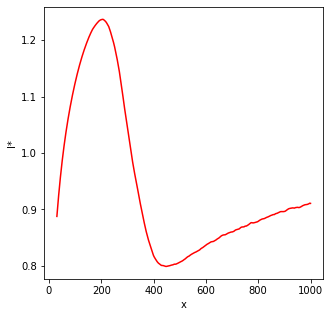

In [ ]:
plt.xlabel("x")
plt.ylabel("l*")
plt.plot(xc[1:-1], l_star[1:-1,1], color="red")
plt.savefig("l_star.png")
plt.show()

## Подсчёт `y+` и `u+`
На участке `200 < x < 400` происходит ламинарно-турбулентный переход.
Величины `y+`, `u+`  строятся для сечений `x=const`. Т.е. фиксируем значения  `l* v*` на стенке в данном сечении
и далее вычисляем `y+, u+` вдоль сечения по этим величинам.

In [ ]:
plt.title("Распределение dudy в сечении x=300")
plt.xlabel("y")
plt.ylabel("dudy")
plt.grid()
plt.plot(yc[1:-1], tau[300,1:-1], color="black")
plt.savefig("dudy_x300")
plt.show()

NameError: ignored

In [ ]:
plt.title("Распределение l* в сечении x=300")
plt.xlabel("y")
plt.ylabel("l*")
plt.grid()
plt.plot(yc[1:-1], l_star[300,1:-1], color="red")
plt.show()

In [ ]:
plt.title("Распределение v* в сечении x=300")
plt.xlabel("y")
plt.ylabel("v*")
plt.grid()
plt.plot(yc[1:-1], v_star[300,1:-1], color="orange")
plt.show()

In [ ]:
plt.title("Распределение tau в сечении x=300")
plt.xlabel("y")
plt.ylabel("tau")
plt.grid()
plt.plot(yc[1:-1], tau[300,1:-1], color="black")
plt.show()

In [ ]:
real_y_plus = (yc[1] - yc[0]) * v_star[300, 1] / visc
real_u_plus = um[300, 1] / v_star[300, 1]
print("y+ = ", real_y_plus)
print("u+ = ", real_u_plus)

y+ =  0.19771396886990653
u+ =  0.2954619001583761


In [ ]:
plt.title("Распределение y+ в сечении x=300")
plt.xlabel("y")
plt.ylabel("y+")
plt.grid()
plt.text(0.3, .217, str(round(real_y_plus,4)))
plt.plot(yc[1:-1], y_plus[300,1:-1], color="brown")
plt.savefig("y_plus_new.png")
plt.show()

In [ ]:
plt.title("Распределение u+ в сечении x=300")
plt.xlabel("y")
plt.ylabel("u+")
plt.grid()
plt.text(0, 100, str(round(real_u_plus,4)))
plt.plot(yc[1:-1], u_plus[300,1:-1], color="navy")
plt.savefig("u_plus_new.png")
plt.show()

In [ ]:
plt.title("Турбулентная вязкость по формуле Прандтля", fontsize=200)
plt.xlabel("x", fontsize=200)
plt.ylabel("y", fontsize=200)
plt.pcolormesh(xc[1:], yc[2:130], np.transpose(turb_visc[1:,2:130]))
plt.savefig("turb_visc.png")
plt.show()

In [ ]:
plt.title("Распределение турбулентной вязкости в сечении x=300")
plt.xlabel("y")
plt.ylabel("turb_visc")
plt.grid()
plt.plot(yc[1:-1], turb_visc[300,1:-1], color="black")
plt.savefig("turb_visc_x300.png")
plt.show()

In [ ]:
new_y_plus = np.zeros((222,0)
for j in range(1,223):
  new_y_plus = yc[j] * v_star[300,j] /   


SyntaxError: ignored

## Trash

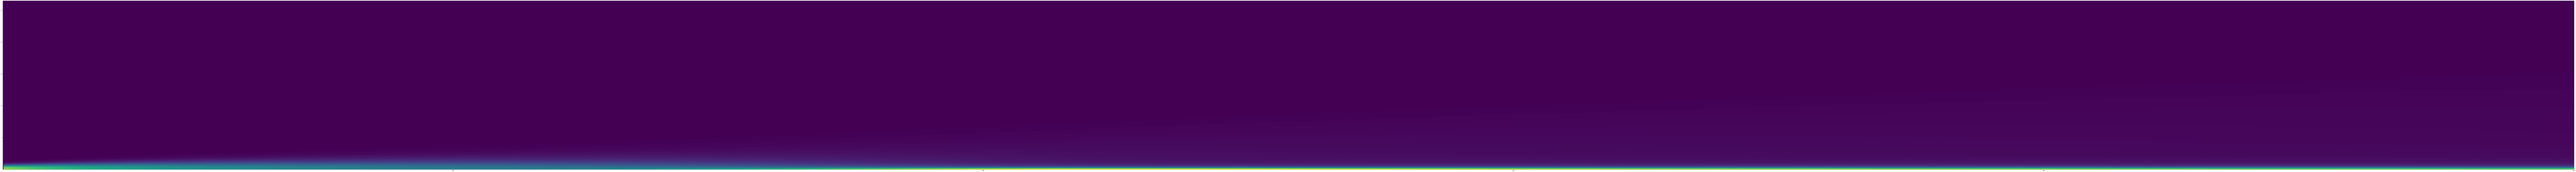

In [ ]:
plt.pcolormesh(xc, yc, np.transpose(dudy))
plt.show()

In [ ]:
plt.pcolormesh(xc, yc, np.transpose(tau))
plt.show()

In [ ]:
plt.pcolormesh(xc, yc, np.transpose(v_star))
plt.show()

In [ ]:
plt.pcolormesh(xc, yc, np.transpose(l_star))
plt.show()

In [ ]:
plt.pcolormesh(xc, yc, np.transpose(y_plus))
plt.show()

In [ ]:
plt.pcolormesh(xc, yc, np.transpose(u_plus))
plt.show()

In [ ]:
# dudy[0,:]
dudy[1:, 1]
# l_star[300,1]

array([1.58623814, 1.58015244, 1.57413801, ..., 1.50660755, 1.50684715,
       1.50711298])

## Random notes

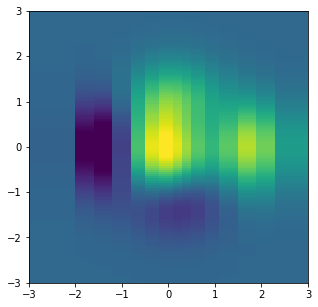

In [ ]:

# make data with uneven sampling in x
x = [-3, -2, -1.6, -1.2, -.8, -.5, -.2, .1, .3, .5, .8, 1.1, 1.5, 1.9, 2.3, 3]
X, Y = np.meshgrid(x, np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.pcolormesh(X, Y, Z, vmin=-0.5, vmax=1.0)

plt.show()